### IMPORTATION DES PACKAGES NECESSAIRE POUR LES CALCULS

In [ ]:
import numpy as np
import pandas as pd
import sys
import os
import logging
import pathlib as pl
from logging.config import dictConfig
from typing import Optional, Union
import datetime

from box import Box
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as subplots

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 600)
pd.set_option("mode.chained_assignment", "raise")


# Set the path to the root directory of the project
def set_paths() -> None:
    """ set correct working directory  """

    # only change the directory if we have not yet done so
    if "cwd" not in globals():
        global cwd
        cwd = os.path.join(os.getcwd(), os.pardir)
        os.chdir(cwd)


set_paths()

### VISUALISATION GRAPHIQUE DES SITES 

In [2]:
import pandas as pd
import folium
from folium import plugins
from IPython.display import display

def dms_to_dd(dms):
    """Convert DMS (degrees, minutes, seconds) to decimal degrees."""
    parts = dms.split(' ')
    degrees = float(parts[0][:-1])
    minutes = float(parts[1][:-1])
    seconds = float(parts[2][:-1].replace(',', '.'))
    return degrees + (minutes / 60) + (seconds / 3600)

# Data for the locations
data = {
    'Site/Ville': ['UFHB/ABIDJAN', 'SAB/M’BRIMBO (PK 140)', 'INPHB SUD/YAMOUSSOUKRO'],
    'Latitude (Nord)': ['5° 20\' 33"', '6° 2\' 18,96"', '6° 52\' 9,12"'],
    'Longitude (Ouest)': ['-5° 60\' 23,78"', '-5.9° 54\' 15,12"', '-5° 14\' 22,56"'],
    'Altitude': ['48 m', '92 m', '243 m']
}

df = pd.DataFrame(data)

# Convert DMS to decimal degrees
df['Latitude (Nord)'] = df['Latitude (Nord)'].apply(dms_to_dd)
df['Longitude (Ouest)'] = df['Longitude (Ouest)'].apply(dms_to_dd)

# Remove altitude units
df['Altitude'] = df['Altitude'].str.replace(' m', '').astype(float)

# Create a map centered around Ivory Coast
m = folium.Map(location=[7.54, -5.55], zoom_start=7)

# Add points to the map
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude (Nord)'], row['Longitude (Ouest)']],
        popup=row['Site/Ville'],
        tooltip=row['Site/Ville']
    ).add_to(m)

# Display the map in the notebook
display(m)

### Importation Des Données

In [4]:
folder_path = './data/input'
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

In [5]:
df_list = []

for file in excel_files:
    print("reading file", file)
    town_name = file.split(' ')[0]  # Assumes town name is the first element before a space

    df = pd.read_excel(os.path.join(folder_path, file), sheet_name="Feuil1")
    
    print(df.columns)
    
    if "Rad." in df.columns:
        df.rename(columns={'Rad.': 'Solar Rad.'}, inplace=True)
    elif "Solar" in df.columns:
        df.rename(columns={'Solar': 'Solar Rad.'}, inplace=True)

    null_rows = df[df['Date'].isna() | df['Time'].isna()]

    print("null rows in df ", null_rows)
    
    df['Town'] = town_name

    df_list.append(df)

final_df = pd.concat(df_list, ignore_index=True)

reading file Abidjan Aout 2017 vraie.xlsx
Index(['Date', 'Time', 'Rad.'], dtype='object')
null rows in df  Empty DataFrame
Columns: [Date, Time, Solar Rad.]
Index: []
reading file Abidjan Aout 2018.xlsx
Index(['Date', 'Time', 'Rad.'], dtype='object')
null rows in df  Empty DataFrame
Columns: [Date, Time, Solar Rad.]
Index: []
reading file Abidjan Avril 2017 vraie.xlsx
Index(['Date', 'Time', 'Rad.'], dtype='object')
null rows in df  Empty DataFrame
Columns: [Date, Time, Solar Rad.]
Index: []
reading file Abidjan Avril 2018.xlsx
Index(['Date', 'Time', 'Rad.'], dtype='object')
null rows in df  Empty DataFrame
Columns: [Date, Time, Solar Rad.]
Index: []
reading file Abidjan Decembre 2017 Vraie.xlsx
Index(['Date', 'Time', 'Rad.'], dtype='object')
null rows in df  Empty DataFrame
Columns: [Date, Time, Solar Rad.]
Index: []
reading file Abidjan Decembre 2018.xlsx
Index(['Date', 'Time', 'Rad.'], dtype='object')
null rows in df  Empty DataFrame
Columns: [Date, Time, Solar Rad.]
Index: []
readin

Index(['Date', 'Time', 'Solar Rad.'], dtype='object')
null rows in df  Empty DataFrame
Columns: [Date, Time, Solar Rad.]
Index: []
reading file M'brimbo Janvier 2017.xlsx
Index(['Date', 'Time', 'Solar Rad.', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36'],
      dtype='object')
null rows in df  Empty DataFrame
Columns: [Date, Time, Solar Rad., Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6, Unnamed: 7, Unnamed: 8, Unnamed: 9, Unnamed: 10, Unnamed: 11, Unnamed: 12, Unnamed: 13, Unnamed

Index(['Date', 'Time', 'Rad.', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36'],
      dtype='object')
null rows in df        Date Time  Solar Rad.  Unnamed: 3  Unnamed: 4 Unnamed: 5 Unnamed: 6  \
29616  NaT  NaN         306         NaN         NaN        NaN        NaN   
29617  NaT  NaN         306         NaN         NaN        NaN        NaN   
32178  NaT  NaN         373         NaN         NaN        NaN        NaN   

      Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 1

In [6]:
final_df = final_df[['Date', 'Time', 'Solar Rad.', 'Town']]

In [7]:
null_rows = final_df[final_df['Date'].isna() | final_df['Time'].isna() ]

print(null_rows)

        Date Time Solar Rad.      Town
1522873  NaT  NaN        306  M'brimbo
1522874  NaT  NaN        306  M'brimbo
1525435  NaT  NaN        373  M'brimbo


In [8]:
final_df.shape

(2347295, 4)

In [9]:
final_df = final_df.dropna()

In [10]:
final_df.shape

(2347292, 4)

### Transformation des Données

In [11]:
final_df['Datetime'] = pd.to_datetime(final_df['Date'].astype(str) + ' ' + final_df['Time'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [12]:


final_df['Town'].value_counts()

Abidjan         931109
Yamoussoukro    779703
M'brimbo        462771
M'Brimbo        173709
Name: Town, dtype: int64

In [13]:
final_df

,Date,Time,Solar Rad.,Town,Datetime
0,2017-08-01,00:01:00,0,Abidjan,2017-08-01 00:01:00
1,2017-08-01,00:02:00,0,Abidjan,2017-08-01 00:02:00
2,2017-08-01,00:03:00,0,Abidjan,2017-08-01 00:03:00
3,2017-08-01,00:04:00,0,Abidjan,2017-08-01 00:04:00
4,2017-08-01,00:05:00,0,Abidjan,2017-08-01 00:05:00
...,...,...,...,...,...
2347290,2018-09-30,23:56:00,---,Yamoussoukro,2018-09-30 23:56:00
2347291,2018-09-30,23:57:00,---,Yamoussoukro,2018-09-30 23:57:00
2347292,2018-09-30,23:58:00,---,Yamoussoukro,2018-09-30 23:58:00
2347293,2018-09-30,23:59:00,---,Yamoussoukro,2018-09-30 23:59:00


In [14]:
nan_string_rows = final_df[final_df['Datetime'].isna()]

print(nan_string_rows)

Empty DataFrame
Columns: [Date, Time, Solar Rad., Town, Datetime]
Index: []


In [15]:
df_sorted = final_df.sort_values(by=["Datetime", "Town"] , ascending=True).reset_index(drop=True)


In [16]:
df_sorted

,Date,Time,Solar Rad.,Town,Datetime
0,2017-01-01,06:00:00,18,Yamoussoukro,2017-01-01 06:00:00
1,2017-01-01,06:01:00,18,Yamoussoukro,2017-01-01 06:01:00
2,2017-01-01,06:02:00,19,Yamoussoukro,2017-01-01 06:02:00
3,2017-01-01,06:03:00,19,Yamoussoukro,2017-01-01 06:03:00
4,2017-01-01,06:04:00,19,Yamoussoukro,2017-01-01 06:04:00
...,...,...,...,...,...
2347287,2018-12-31,23:57:00,0,Yamoussoukro,2018-12-31 23:57:00
2347288,2018-12-31,23:58:00,0,Abidjan,2018-12-31 23:58:00
2347289,2018-12-31,23:58:00,0,Yamoussoukro,2018-12-31 23:58:00
2347290,2018-12-31,23:59:00,0,Abidjan,2018-12-31 23:59:00


In [17]:
df_sorted['Town'].value_counts()

Abidjan         931109
Yamoussoukro    779703
M'brimbo        462771
M'Brimbo        173709
Name: Town, dtype: int64

In [18]:
def map_town(value):
    """ Utils """
    if value in ["M'brimbo"]:
        return "M'Brimbo"
    else:
        return value

In [19]:
df_sorted['Town'] = df_sorted['Town'].apply(map_town)


In [20]:
df_sorted['Town'].value_counts()

Abidjan         931109
Yamoussoukro    779703
M'Brimbo        636480
Name: Town, dtype: int64

In [21]:
df_abidjan, df_yakro, df_mbrimbo = df_sorted[df_sorted['Town'] == "Abidjan"].reset_index(drop=True), df_sorted[df_sorted['Town'] == "Yamoussoukro"].reset_index(drop=True), df_sorted[df_sorted['Town'] == "M'Brimbo"].reset_index(drop=True) 

In [22]:
df_abidjan

,Date,Time,Solar Rad.,Town,Datetime
0,2017-03-01,00:01:00,0,Abidjan,2017-03-01 00:01:00
1,2017-03-01,00:02:00,0,Abidjan,2017-03-01 00:02:00
2,2017-03-01,00:03:00,0,Abidjan,2017-03-01 00:03:00
3,2017-03-01,00:04:00,0,Abidjan,2017-03-01 00:04:00
4,2017-03-01,00:05:00,0,Abidjan,2017-03-01 00:05:00
...,...,...,...,...,...
931104,2018-12-31,23:55:00,0,Abidjan,2018-12-31 23:55:00
931105,2018-12-31,23:56:00,0,Abidjan,2018-12-31 23:56:00
931106,2018-12-31,23:57:00,0,Abidjan,2018-12-31 23:57:00
931107,2018-12-31,23:58:00,0,Abidjan,2018-12-31 23:58:00


In [24]:
df_abidjan.to_csv('./abidjan_sol.csv', index=False)

In [25]:
df_yakro

,Date,Time,Solar Rad.,Town,Datetime
0,2017-01-01,06:00:00,18,Yamoussoukro,2017-01-01 06:00:00
1,2017-01-01,06:01:00,18,Yamoussoukro,2017-01-01 06:01:00
2,2017-01-01,06:02:00,19,Yamoussoukro,2017-01-01 06:02:00
3,2017-01-01,06:03:00,19,Yamoussoukro,2017-01-01 06:03:00
4,2017-01-01,06:04:00,19,Yamoussoukro,2017-01-01 06:04:00
...,...,...,...,...,...
779698,2018-12-31,23:55:00,0,Yamoussoukro,2018-12-31 23:55:00
779699,2018-12-31,23:56:00,0,Yamoussoukro,2018-12-31 23:56:00
779700,2018-12-31,23:57:00,0,Yamoussoukro,2018-12-31 23:57:00
779701,2018-12-31,23:58:00,0,Yamoussoukro,2018-12-31 23:58:00


In [26]:
df_yakro.to_csv('./yakro_sol.csv', index=False)

In [27]:
df_mbrimbo

,Date,Time,Solar Rad.,Town,Datetime
0,2017-01-06,13:24:00,780,M'Brimbo,2017-01-06 13:24:00
1,2017-01-06,13:25:00,729,M'Brimbo,2017-01-06 13:25:00
2,2017-01-06,13:26:00,714,M'Brimbo,2017-01-06 13:26:00
3,2017-01-06,13:27:00,541,M'Brimbo,2017-01-06 13:27:00
4,2017-01-06,13:28:00,582,M'Brimbo,2017-01-06 13:28:00
...,...,...,...,...,...
636475,2018-11-24,16:01:00,350,M'Brimbo,2018-11-24 16:01:00
636476,2018-11-24,16:02:00,352,M'Brimbo,2018-11-24 16:02:00
636477,2018-11-24,16:03:00,357,M'Brimbo,2018-11-24 16:03:00
636478,2018-11-24,16:04:00,367,M'Brimbo,2018-11-24 16:04:00


In [1]:
df_mbrimbo.to_csv('./mbrimbo_sol.csv', index=False)

NameError: name 'df_mbrimbo' is not defined

### Chargement des données transformées

In [2]:
df_abidjan = pd.read_csv('./abidjan_sol.csv')
df_mbrimbo = pd.read_csv('./mbrimbo_sol.csv')
df_yakro = pd.read_csv('./yakro_sol.csv')

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_abidjan

,Date,Time,Solar Rad.,Town,Datetime
0,2017-03-01 00:00:00,00:01:00,0,Abidjan,2017-03-01 00:01:00
1,2017-03-01 00:00:00,00:02:00,0,Abidjan,2017-03-01 00:02:00
2,2017-03-01 00:00:00,00:03:00,0,Abidjan,2017-03-01 00:03:00
3,2017-03-01 00:00:00,00:04:00,0,Abidjan,2017-03-01 00:04:00
4,2017-03-01 00:00:00,00:05:00,0,Abidjan,2017-03-01 00:05:00
...,...,...,...,...,...
931104,2018-12-31 00:00:00,23:55:00,0,Abidjan,2018-12-31 23:55:00
931105,2018-12-31 00:00:00,23:56:00,0,Abidjan,2018-12-31 23:56:00
931106,2018-12-31 00:00:00,23:57:00,0,Abidjan,2018-12-31 23:57:00
931107,2018-12-31 00:00:00,23:58:00,0,Abidjan,2018-12-31 23:58:00


In [4]:
df_mbrimbo

,Date,Time,Solar Rad.,Town,Datetime
0,2017-01-06 00:00:00,13:24:00,780,M'Brimbo,2017-01-06 13:24:00
1,2017-01-06 00:00:00,13:25:00,729,M'Brimbo,2017-01-06 13:25:00
2,2017-01-06 00:00:00,13:26:00,714,M'Brimbo,2017-01-06 13:26:00
3,2017-01-06 00:00:00,13:27:00,541,M'Brimbo,2017-01-06 13:27:00
4,2017-01-06 00:00:00,13:28:00,582,M'Brimbo,2017-01-06 13:28:00
...,...,...,...,...,...
636475,2018-11-24 00:00:00,16:01:00,350,M'Brimbo,2018-11-24 16:01:00
636476,2018-11-24 00:00:00,16:02:00,352,M'Brimbo,2018-11-24 16:02:00
636477,2018-11-24 00:00:00,16:03:00,357,M'Brimbo,2018-11-24 16:03:00
636478,2018-11-24 00:00:00,16:04:00,367,M'Brimbo,2018-11-24 16:04:00


In [5]:
df_yakro

,Date,Time,Solar Rad.,Town,Datetime
0,2017-01-01 00:00:00,06:00:00,18,Yamoussoukro,2017-01-01 06:00:00
1,2017-01-01 00:00:00,06:01:00,18,Yamoussoukro,2017-01-01 06:01:00
2,2017-01-01 00:00:00,06:02:00,19,Yamoussoukro,2017-01-01 06:02:00
3,2017-01-01 00:00:00,06:03:00,19,Yamoussoukro,2017-01-01 06:03:00
4,2017-01-01 00:00:00,06:04:00,19,Yamoussoukro,2017-01-01 06:04:00
...,...,...,...,...,...
779698,2018-12-31 00:00:00,23:55:00,0,Yamoussoukro,2018-12-31 23:55:00
779699,2018-12-31 00:00:00,23:56:00,0,Yamoussoukro,2018-12-31 23:56:00
779700,2018-12-31 00:00:00,23:57:00,0,Yamoussoukro,2018-12-31 23:57:00
779701,2018-12-31 00:00:00,23:58:00,0,Yamoussoukro,2018-12-31 23:58:00


In [6]:
df_abidjan.columns

Index(['Date', 'Time', 'Solar Rad.', 'Town', 'Datetime'], dtype='object')

#### Remplissage des valeurs Nan (Optional)

In [7]:

def preprocess_solar_rad(df):
    """Convert 'Solar Rad.' to numeric, coerce errors to NaN"""
    
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    
    df['Solar Rad.'] = pd.to_numeric(df['Solar Rad.'], errors='coerce')
    
    # Fill NaN values with forward fill method
    df['Solar Rad.'] = df['Solar Rad.'].fillna(method='ffill')
    
    # Check if there are still any NaN values left
    if df['Solar Rad.'].isna().sum() > 0:
        raise ValueError("There are still NaN values in 'Solar Rad.' column after forward fill.")
    
    return df



In [46]:
df_abidjan_filled = preprocess_solar_rad(df_abidjan)

In [50]:
df_mbrimbo_filled = preprocess_solar_rad(df_mbrimbo)

In [51]:
df_yakro_filled = preprocess_solar_rad(df_yakro)

In [21]:
df_abidjan_filled

,Date,Time,Solar Rad.,Town,Datetime
0,2017-03-01 00:00:00,00:01:00,0.0,Abidjan,2017-03-01 00:01:00
1,2017-03-01 00:00:00,00:02:00,0.0,Abidjan,2017-03-01 00:02:00
2,2017-03-01 00:00:00,00:03:00,0.0,Abidjan,2017-03-01 00:03:00
3,2017-03-01 00:00:00,00:04:00,0.0,Abidjan,2017-03-01 00:04:00
4,2017-03-01 00:00:00,00:05:00,0.0,Abidjan,2017-03-01 00:05:00
...,...,...,...,...,...
931104,2018-12-31 00:00:00,23:55:00,0.0,Abidjan,2018-12-31 23:55:00
931105,2018-12-31 00:00:00,23:56:00,0.0,Abidjan,2018-12-31 23:56:00
931106,2018-12-31 00:00:00,23:57:00,0.0,Abidjan,2018-12-31 23:57:00
931107,2018-12-31 00:00:00,23:58:00,0.0,Abidjan,2018-12-31 23:58:00


In [22]:
df_mbrimbo_filled

,Date,Time,Solar Rad.,Town,Datetime
0,2017-01-06 00:00:00,13:24:00,780.0,M'Brimbo,2017-01-06 13:24:00
1,2017-01-06 00:00:00,13:25:00,729.0,M'Brimbo,2017-01-06 13:25:00
2,2017-01-06 00:00:00,13:26:00,714.0,M'Brimbo,2017-01-06 13:26:00
3,2017-01-06 00:00:00,13:27:00,541.0,M'Brimbo,2017-01-06 13:27:00
4,2017-01-06 00:00:00,13:28:00,582.0,M'Brimbo,2017-01-06 13:28:00
...,...,...,...,...,...
636475,2018-11-24 00:00:00,16:01:00,350.0,M'Brimbo,2018-11-24 16:01:00
636476,2018-11-24 00:00:00,16:02:00,352.0,M'Brimbo,2018-11-24 16:02:00
636477,2018-11-24 00:00:00,16:03:00,357.0,M'Brimbo,2018-11-24 16:03:00
636478,2018-11-24 00:00:00,16:04:00,367.0,M'Brimbo,2018-11-24 16:04:00


In [23]:
df_yakro_filled

,Date,Time,Solar Rad.,Town,Datetime
0,2017-01-01 00:00:00,06:00:00,18.0,Yamoussoukro,2017-01-01 06:00:00
1,2017-01-01 00:00:00,06:01:00,18.0,Yamoussoukro,2017-01-01 06:01:00
2,2017-01-01 00:00:00,06:02:00,19.0,Yamoussoukro,2017-01-01 06:02:00
3,2017-01-01 00:00:00,06:03:00,19.0,Yamoussoukro,2017-01-01 06:03:00
4,2017-01-01 00:00:00,06:04:00,19.0,Yamoussoukro,2017-01-01 06:04:00
...,...,...,...,...,...
779698,2018-12-31 00:00:00,23:55:00,0.0,Yamoussoukro,2018-12-31 23:55:00
779699,2018-12-31 00:00:00,23:56:00,0.0,Yamoussoukro,2018-12-31 23:56:00
779700,2018-12-31 00:00:00,23:57:00,0.0,Yamoussoukro,2018-12-31 23:57:00
779701,2018-12-31 00:00:00,23:58:00,0.0,Yamoussoukro,2018-12-31 23:58:00


### Exploration des données

In [8]:
def process_and_check_dataframe(df):
    # Ensure the 'Datetime' column is present
    if 'Datetime' not in df.columns:
        df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
        
    else:
        df['Datetime'] = pd.to_datetime( df['Datetime'])
    
    # Filter rows between 6:00 AM and 6:00 PM
    df = df[(df['Datetime'].dt.time >= pd.to_datetime('06:00:00').time()) &
            (df['Datetime'].dt.time <= pd.to_datetime('18:00:00').time())]
    
    # Create 'Year' and 'Month' columns
    df_copy = df.copy()
    df_copy.loc[:, 'Year'] = df_copy['Datetime'].dt.year
    df_copy.loc[:, 'Month'] = df_copy['Datetime'].dt.month
    
    # Dictionary to store missing minutes per hour for each day
    missing_minutes_per_hour = {}
    
    # Check for missing data
    df_copy.set_index('Datetime', inplace=True)
    
        # Ensure the index is unique before proceeding
    df_copy = df_copy[~df_copy.index.duplicated(keep='first')]
    
    grouped = df_copy.groupby(df_copy.index.date)
    
    for date, group in grouped:
        missing_minutes_per_hour[date] = {}
        
        # Create a full range of minutes for the day between 6:00 and 18:00
        full_range = pd.date_range(start=f"{date} 06:00:00", end=f"{date} 18:00:00", freq='T')
        missing_times = full_range.difference(group.index)
        
        if not missing_times.empty:
            for missing_time in missing_times:
                hour = missing_time.hour
                if hour not in missing_minutes_per_hour[date]:
                    missing_minutes_per_hour[date][hour] = 0
                missing_minutes_per_hour[date][hour] += 1

            # Reindex the group to include missing times
            group = group.reindex(full_range)

            # Forward fill the missing data
            group = group.ffill()
            
            # Update the original DataFrame with the reindexed group
            df_copy.update(group)
    
    # Reset the index to the default integer index
    df_copy.reset_index(inplace=True)

    return df_copy, missing_minutes_per_hour

In [9]:
df_abidjan, miss_abidjan = process_and_check_dataframe(df_abidjan)

In [47]:
df_abidjan_filled, miss_abidjan_filled = process_and_check_dataframe(df_abidjan_filled)

In [48]:
df_abidjan_filled

,Datetime,Date,Time,Solar Rad.,Town,Year,Month
0,2017-03-01 06:00:00,2017-03-01 00:00:00,06:00:00,0.0,Abidjan,2017.0,3.0
1,2017-03-01 06:01:00,2017-03-01 00:00:00,06:01:00,0.0,Abidjan,2017.0,3.0
2,2017-03-01 06:02:00,2017-03-01 00:00:00,06:02:00,0.0,Abidjan,2017.0,3.0
3,2017-03-01 06:03:00,2017-03-01 00:00:00,06:03:00,0.0,Abidjan,2017.0,3.0
4,2017-03-01 06:04:00,2017-03-01 00:00:00,06:04:00,0.0,Abidjan,2017.0,3.0
...,...,...,...,...,...,...,...
463547,2018-12-31 17:56:00,2018-12-31 00:00:00,17:56:00,12.0,Abidjan,2018.0,12.0
463548,2018-12-31 17:57:00,2018-12-31 00:00:00,17:57:00,12.0,Abidjan,2018.0,12.0
463549,2018-12-31 17:58:00,2018-12-31 00:00:00,17:58:00,11.0,Abidjan,2018.0,12.0
463550,2018-12-31 17:59:00,2018-12-31 00:00:00,17:59:00,9.0,Abidjan,2018.0,12.0


In [26]:
df_abidjan_filled

,Datetime,Date,Time,Solar Rad.,Town,Year,Month
0,2017-03-01 06:00:00,2017-03-01 00:00:00,06:00:00,0.0,Abidjan,2017,3
1,2017-03-01 06:01:00,2017-03-01 00:00:00,06:01:00,0.0,Abidjan,2017,3
2,2017-03-01 06:02:00,2017-03-01 00:00:00,06:02:00,0.0,Abidjan,2017,3
3,2017-03-01 06:03:00,2017-03-01 00:00:00,06:03:00,0.0,Abidjan,2017,3
4,2017-03-01 06:04:00,2017-03-01 00:00:00,06:04:00,0.0,Abidjan,2017,3
...,...,...,...,...,...,...,...
464044,2018-12-31 17:56:00,2018-12-31 00:00:00,17:56:00,12.0,Abidjan,2018,12
464045,2018-12-31 17:57:00,2018-12-31 00:00:00,17:57:00,12.0,Abidjan,2018,12
464046,2018-12-31 17:58:00,2018-12-31 00:00:00,17:58:00,11.0,Abidjan,2018,12
464047,2018-12-31 17:59:00,2018-12-31 00:00:00,17:59:00,9.0,Abidjan,2018,12


In [35]:
df_abidjan_filled.shape

(464049, 8)

In [40]:
df_abidjan_filled.shape

(463552, 8)

In [41]:
miss_abidjan_filled

{datetime.date(2017, 3, 1): {7: 1},
 datetime.date(2017, 3, 2): {7: 1},
 datetime.date(2017, 3, 3): {9: 1},
 datetime.date(2017, 3, 4): {},
 datetime.date(2017, 3, 5): {},
 datetime.date(2017, 3, 6): {17: 4},
 datetime.date(2017, 3, 7): {9: 1},
 datetime.date(2017, 3, 8): {},
 datetime.date(2017, 3, 9): {7: 2},
 datetime.date(2017, 3, 10): {},
 datetime.date(2017, 3, 11): {},
 datetime.date(2017, 3, 12): {},
 datetime.date(2017, 3, 13): {},
 datetime.date(2017, 3, 14): {7: 1},
 datetime.date(2017, 3, 15): {8: 1},
 datetime.date(2017, 3, 16): {},
 datetime.date(2017, 3, 17): {},
 datetime.date(2017, 3, 18): {6: 60,
  7: 60,
  8: 60,
  9: 60,
  10: 60,
  11: 60,
  12: 18},
 datetime.date(2017, 3, 19): {},
 datetime.date(2017, 3, 20): {6: 2, 7: 1},
 datetime.date(2017, 3, 21): {8: 1},
 datetime.date(2017, 3, 22): {},
 datetime.date(2017, 3, 23): {},
 datetime.date(2017, 3, 24): {9: 1},
 datetime.date(2017, 3, 25): {},
 datetime.date(2017, 3, 26): {16: 3},
 datetime.date(2017, 3, 27): {17:

In [26]:
df_abidjan[df_abidjan['Date'] == "2018-03-17"]

,Datetime,Date,Time,Solar Rad.,Town,Year,Month
265639,2018-03-17 13:51:00,2018-03-17,13:51:00,886,Abidjan,2018,3
265640,2018-03-17 13:52:00,2018-03-17,13:52:00,881,Abidjan,2018,3
265641,2018-03-17 13:53:00,2018-03-17,13:53:00,928,Abidjan,2018,3
265642,2018-03-17 13:54:00,2018-03-17,13:54:00,872,Abidjan,2018,3
265643,2018-03-17 13:55:00,2018-03-17,13:55:00,780,Abidjan,2018,3
265644,2018-03-17 13:56:00,2018-03-17,13:56:00,780,Abidjan,2018,3
265645,2018-03-17 13:57:00,2018-03-17,13:57:00,780,Abidjan,2018,3
265646,2018-03-17 13:58:00,2018-03-17,13:58:00,455,Abidjan,2018,3
265647,2018-03-17 13:59:00,2018-03-17,13:59:00,412,Abidjan,2018,3
265648,2018-03-17 14:00:00,2018-03-17,14:00:00,404,Abidjan,2018,3


In [10]:
miss_abidjan


{datetime.date(2017, 3, 1): {7: 1},
 datetime.date(2017, 3, 2): {7: 1},
 datetime.date(2017, 3, 3): {9: 1},
 datetime.date(2017, 3, 4): {},
 datetime.date(2017, 3, 5): {},
 datetime.date(2017, 3, 6): {17: 4},
 datetime.date(2017, 3, 7): {9: 1},
 datetime.date(2017, 3, 8): {},
 datetime.date(2017, 3, 9): {7: 2},
 datetime.date(2017, 3, 10): {},
 datetime.date(2017, 3, 11): {},
 datetime.date(2017, 3, 12): {},
 datetime.date(2017, 3, 13): {},
 datetime.date(2017, 3, 14): {7: 1},
 datetime.date(2017, 3, 15): {8: 1},
 datetime.date(2017, 3, 16): {},
 datetime.date(2017, 3, 17): {},
 datetime.date(2017, 3, 18): {6: 60,
  7: 60,
  8: 60,
  9: 60,
  10: 60,
  11: 60,
  12: 18},
 datetime.date(2017, 3, 19): {},
 datetime.date(2017, 3, 20): {6: 2, 7: 1},
 datetime.date(2017, 3, 21): {8: 1},
 datetime.date(2017, 3, 22): {},
 datetime.date(2017, 3, 23): {},
 datetime.date(2017, 3, 24): {9: 1},
 datetime.date(2017, 3, 25): {},
 datetime.date(2017, 3, 26): {16: 3},
 datetime.date(2017, 3, 27): {17:

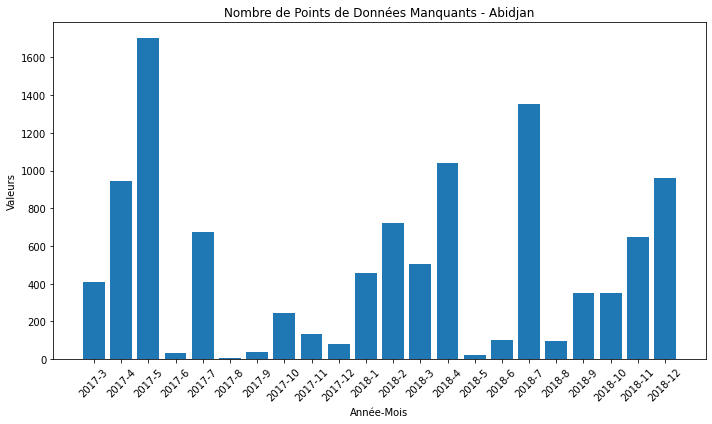

In [28]:
from collections import defaultdict

data = miss_abidjan

plot_data = defaultdict(int)

for date, values in data.items():
    if values:
        month_year = (date.year, date.month)
        plot_data[month_year] += sum(values.values())

# Extract x (months) and y (sum of values)
months = sorted(plot_data.keys())
sum_values = [plot_data[month] for month in months]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(months)), sum_values, tick_label=[f"{m[0]}-{m[1]}" for m in months])
plt.xlabel('Année-Mois')
plt.ylabel('Valeurs')
plt.title('Nombre de Points de Données Manquants - Abidjan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [88]:
list_x = [x for x in miss_abidjan.keys() if miss_abidjan[x] == {}]

In [89]:
len(list_x)

430

In [90]:
len(miss_abidjan)

658

In [13]:
df_yakro, miss_yakro = process_and_check_dataframe(df_yakro)

In [53]:
df_yakro_filled, miss_yakro_filled = process_and_check_dataframe(df_yakro_filled)

In [14]:
miss_yakro

{datetime.date(2017, 1, 1): {18: 1},
 datetime.date(2017, 1, 2): {18: 1},
 datetime.date(2017, 1, 3): {18: 1},
 datetime.date(2017, 1, 4): {18: 1},
 datetime.date(2017, 1, 5): {18: 1},
 datetime.date(2017, 1, 7): {6: 1, 18: 1},
 datetime.date(2017, 1, 8): {18: 1},
 datetime.date(2017, 1, 9): {18: 1},
 datetime.date(2017, 1, 10): {18: 1},
 datetime.date(2017, 1, 11): {18: 1},
 datetime.date(2017, 1, 12): {18: 1},
 datetime.date(2017, 1, 13): {18: 1},
 datetime.date(2017, 1, 14): {18: 1},
 datetime.date(2017, 1, 15): {18: 1},
 datetime.date(2017, 1, 16): {18: 1},
 datetime.date(2017, 1, 17): {18: 1},
 datetime.date(2017, 1, 18): {18: 1},
 datetime.date(2017, 1, 19): {18: 1},
 datetime.date(2017, 1, 20): {18: 1},
 datetime.date(2017, 1, 21): {18: 1},
 datetime.date(2017, 1, 22): {18: 1},
 datetime.date(2017, 1, 23): {18: 1},
 datetime.date(2017, 1, 24): {18: 1},
 datetime.date(2017, 1, 25): {18: 1},
 datetime.date(2017, 1, 26): {18: 1},
 datetime.date(2017, 1, 27): {18: 1},
 datetime.date

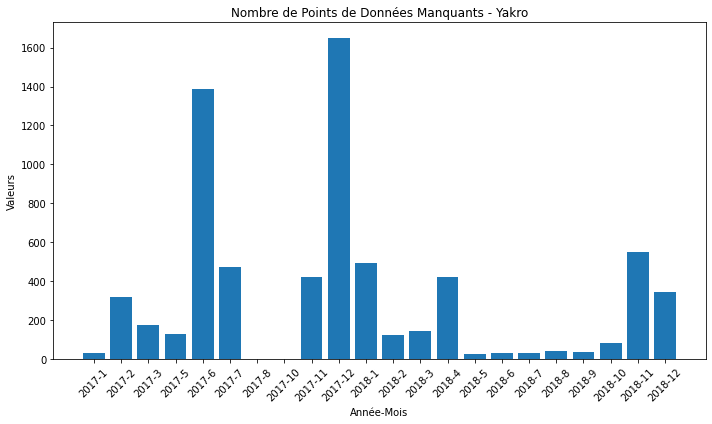

In [27]:

data = miss_yakro

plot_data = defaultdict(int)

for date, values in data.items():
    if values:
        month_year = (date.year, date.month)
        plot_data[month_year] += sum(values.values())

# Extract x (months) and y (sum of values)
months = sorted(plot_data.keys())
sum_values = [plot_data[month] for month in months]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(months)), sum_values, tick_label=[f"{m[0]}-{m[1]}" for m in months])
plt.xlabel('Année-Mois')
plt.ylabel('Valeurs')
plt.title('Nombre de Points de Données Manquants - Yakro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
df_yakro[df_yakro['Date'] == "2017-02-18"]

,Datetime,Date,Time,Solar Rad.,Town,Year,Month
33729,2017-02-18 06:00:00,2017-02-18,06:00:00,26,Yamoussoukro,2017,2
33730,2017-02-18 06:01:00,2017-02-18,06:01:00,28,Yamoussoukro,2017,2
33731,2017-02-18 06:02:00,2017-02-18,06:02:00,29,Yamoussoukro,2017,2
33732,2017-02-18 06:03:00,2017-02-18,06:03:00,32,Yamoussoukro,2017,2
33733,2017-02-18 06:04:00,2017-02-18,06:04:00,32,Yamoussoukro,2017,2
33734,2017-02-18 06:05:00,2017-02-18,06:05:00,33,Yamoussoukro,2017,2
33735,2017-02-18 06:06:00,2017-02-18,06:06:00,35,Yamoussoukro,2017,2
33736,2017-02-18 06:07:00,2017-02-18,06:07:00,35,Yamoussoukro,2017,2
33737,2017-02-18 06:08:00,2017-02-18,06:08:00,37,Yamoussoukro,2017,2
33738,2017-02-18 06:09:00,2017-02-18,06:09:00,39,Yamoussoukro,2017,2


In [16]:
df_mbrimbo, miss_mbrimbo = process_and_check_dataframe(df_mbrimbo)

In [54]:
df_mbrimbo_filled, miss_mbrimbo_filled = process_and_check_dataframe(df_mbrimbo_filled)

In [17]:
miss_mbrimbo

{datetime.date(2017, 1, 6): {6: 60,
  7: 60,
  8: 60,
  9: 60,
  10: 60,
  11: 60,
  12: 60,
  13: 24},
 datetime.date(2017, 1, 7): {10: 47,
  11: 60,
  12: 60,
  13: 60,
  14: 60,
  15: 60,
  16: 60,
  17: 60,
  18: 1},
 datetime.date(2017, 1, 11): {6: 60,
  7: 60,
  8: 60,
  9: 60,
  10: 60,
  11: 60,
  12: 60,
  13: 60,
  14: 60,
  15: 3},
 datetime.date(2017, 1, 12): {},
 datetime.date(2017, 1, 13): {9: 2},
 datetime.date(2017, 1, 14): {},
 datetime.date(2017, 1, 15): {6: 60,
  7: 60,
  8: 60,
  9: 60,
  10: 60,
  11: 60,
  12: 60,
  13: 60,
  14: 60,
  15: 60,
  16: 19},
 datetime.date(2017, 1, 16): {9: 1},
 datetime.date(2017, 1, 17): {},
 datetime.date(2017, 1, 18): {},
 datetime.date(2017, 1, 19): {},
 datetime.date(2017, 1, 20): {},
 datetime.date(2017, 1, 21): {},
 datetime.date(2017, 1, 22): {},
 datetime.date(2017, 1, 23): {},
 datetime.date(2017, 1, 24): {},
 datetime.date(2017, 1, 25): {},
 datetime.date(2017, 1, 26): {},
 datetime.date(2017, 1, 27): {},
 datetime.date(20

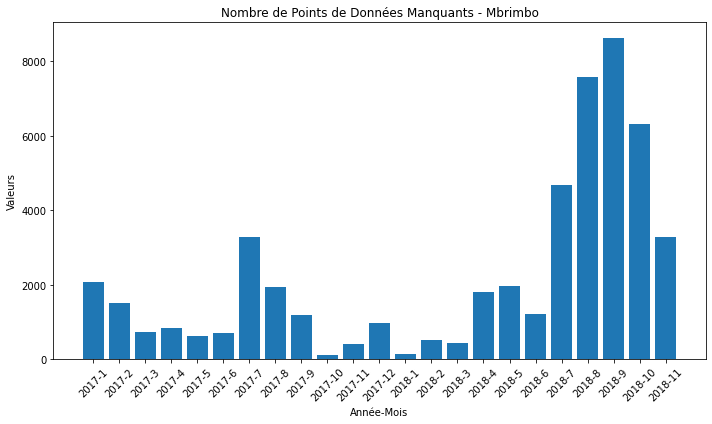

In [29]:

data = miss_mbrimbo

plot_data = defaultdict(int)

for date, values in data.items():
    if values:
        month_year = (date.year, date.month)
        plot_data[month_year] += sum(values.values())

# Extract x (months) and y (sum of values)
months = sorted(plot_data.keys())
sum_values = [plot_data[month] for month in months]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(months)), sum_values, tick_label=[f"{m[0]}-{m[1]}" for m in months])
plt.xlabel('Année-Mois')
plt.ylabel('Valeurs')
plt.title('Nombre de Points de Données Manquants - Mbrimbo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### OS1: Calculs & Tracés des IGH, IGJ & IGM

#### IGH

In [10]:
# def calculate_IGH(df):
#     # Convert 'Datetime' column to datetime format
#     df['Datetime'] = pd.to_datetime(df['Datetime'])
    
#     non_numeric_values = df.loc[df['Solar Rad.'].apply(lambda x: not str(x).isdigit()), 'Solar Rad.']
#     print("Non-numeric values in 'Solar Rad.' column:")
#     print(non_numeric_values)
    
#      # Convert 'Solar Rad.' column to numeric values
#     df['Solar Rad.'] = pd.to_numeric(df['Solar Rad.'], errors='coerce')
    
#     # Calculate hourly solar radiation (IGH) by summing up all minute values within each hour
#     df['Hour'] = df['Datetime'].dt.hour
#     df_igh = df.groupby(['Year', 'Month', 'Date', 'Hour'])['Solar Rad.'].sum().reset_index()
    
#     return df_igh
import matplotlib.ticker as ticker



def calculate_IGH(df):
    # Convert 'Datetime' column to datetime format
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    # Identify non-numeric values in 'Solar Rad.' column
    non_numeric_values = df.loc[df['Solar Rad.'].apply(lambda x: not str(x).isdigit()), 'Solar Rad.']
    print("Non-numeric values in 'Solar Rad.' column:")
    print(non_numeric_values)

    # Convert 'Solar Rad.' column to numeric values, coercing errors to NaN
    df['Solar Rad.'] = pd.to_numeric(df['Solar Rad.'], errors='coerce')

    # Extract year, month, date, and hour from 'Datetime' for grouping
    df['Year'] = df['Datetime'].dt.year
    df['Month'] = df['Datetime'].dt.month
    df['Date'] = df['Datetime'].dt.date
    df['Hour'] = df['Datetime'].dt.hour

    # Group by year, month, date, and hour
    grouped = df.groupby(['Year', 'Month', 'Date', 'Hour'])

    # Calculate IGH: sum the 'Solar Rad.' treating NaNs as zero, and count the non-NaN observations
    df_igh = grouped['Solar Rad.'].agg(['sum', 'count']).reset_index()

    # Normalize IGH by dividing the sum by the number of non-NaN observations
    df_igh['IGH'] = df_igh['sum'] / df_igh['count']

    return df_igh[['Year', 'Month', 'Date', 'Hour', 'IGH']]

def get_month_name_in_french(month_number):
    months_in_french = [
        'Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 
        'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'
    ]
    return months_in_french[month_number - 1]


def plot_monthly_IGH(df_igh):
    # Plot IGH for each day of each month
    for (year, month), group in df_igh.groupby(['Year', 'Month']):
        plt.figure(figsize=(10, 6))
        for day, data in group.groupby('Date'):
            plt.plot(data['Hour'], data['IGH'], label=f'Day {day}', marker='o')
        plt.title(f'Monthly IGH for {year}-{month}')
        plt.xlabel('Hour')
        plt.ylabel('IGH')
        plt.legend()
        plt.grid(True)
        plt.xticks(range(24))
        plt.show()

        
def plot_and_save_IGH(df_igh, city):
    
    # Create output folder
    output_folder = os.path.join('data', 'output', city)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Group by town and iterate over groups
    for (year, month), group in df_igh.groupby(['Year', 'Month']):
        plt.figure(figsize=(12, 10))
        for day, data in group.groupby('Date'):
            day_str = day.strftime('%d-%m-%Y')
            plt.plot(data['Hour'], data['IGH'], label=f'Jour {day_str}', marker='o')
            
        month_name = get_month_name_in_french(month)
        plt.title(f'IGH_Station_{city} {month_name} {year}', fontsize=20)
        plt.xlabel('Heure (UTC)', fontsize=16)
        plt.ylabel('IGH (Wh/m$^2$)', fontsize=16)
        
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
        plt.grid(True)
        plt.xticks(range(6, 19), fontsize=14)
        plt.yticks(fontsize=14)
        
        plt.ylim(bottom=0)  # this line
#         plt.xlim(left=6)  # this line

        
        # Make sure y-axis labels align with the ticks on both sides
#         plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
        
        
        # Save plot
        plot_filename = os.path.join(output_folder, f'IGH_Station_{city}_{month_name}_{year}.png')
        
        plt.tight_layout()
        plt.savefig(plot_filename, bbox_inches="tight", dpi=300)
        
        # Close plot
        plt.close()

##### IGH Abidjan

In [34]:
df_igh_abidjan = calculate_IGH(df_abidjan)

Non-numeric values in 'Solar Rad.' column:
78636     ---
78637     ---
78638     ---
78639     ---
78640     ---
78641     ---
78642     ---
78643     ---
78644     ---
78645     ---
78646     ---
78647     ---
78648     ---
78649     ---
78650     ---
78651     ---
80650     ---
80651     ---
80652     ---
80653     ---
80654     ---
80655     ---
80656     ---
80657     ---
80658     ---
80659     ---
80660     ---
80661     ---
80662     ---
80663     ---
80664     ---
80665     ---
80666     ---
87712     ---
87713     ---
87714     ---
87715     ---
87716     ---
87717     ---
173090    ---
188002    ---
188047    ---
308506    ---
308507    ---
344018    ---
344019    ---
344020    ---
344021    ---
344022    ---
344023    ---
344024    ---
344025    ---
344026    ---
344027    ---
344028    ---
344029    ---
344030    ---
344031    ---
344032    ---
344033    ---
Name: Solar Rad., dtype: object


In [66]:
df_igh_abidjan_filled = calculate_IGH(df_abidjan_filled)

Non-numeric values in 'Solar Rad.' column:
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
463547    12.0
463548    12.0
463549    11.0
463550     9.0
463551     9.0
Name: Solar Rad., Length: 463552, dtype: float64


In [43]:
plot_and_save_IGH(df_igh_abidjan_filled, "abidjan")

##### IGH Yakro

In [36]:
df_igh_yakro = calculate_IGH(df_yakro)

Non-numeric values in 'Solar Rad.' column:
125573       
240229    ---
240230    ---
240231    ---
240232    ---
         ... 
517611    ---
517612    ---
517613    ---
517614    ---
517615    ---
Name: Solar Rad., Length: 7798, dtype: object


In [55]:
df_igh_yakro_filled = calculate_IGH(df_yakro_filled)

Non-numeric values in 'Solar Rad.' column:
0         18.0
1         18.0
2         19.0
3         19.0
4         19.0
          ... 
517962    12.0
517963    12.0
517964    11.0
517965    11.0
517966    11.0
Name: Solar Rad., Length: 517967, dtype: float64


In [56]:
plot_and_save_IGH(df_igh_yakro_filled, "yamoussoukro")

##### IGH Mbrimbo

In [38]:
df_igh_mbrimbo = calculate_IGH(df_mbrimbo)

Non-numeric values in 'Solar Rad.' column:
135518    ---
139576    ---
139577    ---
139581    ---
284763    ---
284764    ---
287185    ---
288313    ---
288314    ---
288315    ---
288829    ---
288830    ---
288963    ---
289024    ---
297269    ---
297270    ---
299548    ---
299553    ---
299920    ---
299921    ---
301517    ---
301868    ---
301869    ---
301984    ---
301985    ---
302313    ---
302314    ---
302392    ---
302783    ---
302784    ---
302878    ---
302888    ---
303358    ---
303359    ---
303388    ---
303389    ---
304398    ---
304399    ---
305393    ---
305394    ---
305398    ---
305399    ---
306766    ---
306767    ---
312382    ---
314898    ---
314899    ---
314940    ---
314941    ---
314965    ---
314966    ---
315101    ---
315320    ---
315321    ---
Name: Solar Rad., dtype: object


In [57]:
df_igh_mbrimbo_filled = calculate_IGH(df_mbrimbo_filled)

Non-numeric values in 'Solar Rad.' column:
0         780.0
1         729.0
2         714.0
3         541.0
4         582.0
          ...  
315315    350.0
315316    352.0
315317    357.0
315318    367.0
315319    367.0
Name: Solar Rad., Length: 315320, dtype: float64


In [39]:
plot_and_save_IGH(df_igh_mbrimbo, "mbrimbo")

In [58]:
plot_and_save_IGH(df_igh_mbrimbo_filled, "mbrimbo")

### IGJ

In [42]:
def calculate_IGJ(igh_df, city):
    
    # Calculate daily IGJ
    igj_df = igh_df.groupby(['Year', 'Month', 'Date'])['IGH'].sum().reset_index()
    
    palette = sns.color_palette("viridis", as_cmap=True)


    # Plot IGJ for each day of each month
    for (year, month), group in igj_df.groupby(['Year', 'Month']):
        plt.figure(figsize=(12, 10))
        df = group[['Date', 'IGH']]
        df = df.rename(columns = {"IGH": "IGJ"})
        df.set_index('Date').plot.bar(label=f'{month}-{year}', color="#FF6600", figsize=(12, 10))

#         bars = plt.bar(group['Date'], group['IGH'], label=f'{month}-{year}', color="#FF6600")
        
        # Add value annotations on the bars
#         for bar in bars:
#             yval = bar.get_height()
#             plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)
        
        month_name = get_month_name_in_french(month)
        
        # Adding grid
        plt.grid(True, axis='y', linewidth=0.5)
        
        plt.xlabel('Jour', fontsize=18)
        plt.ylabel('IGJ (Wh/m$^2$/jour)', fontsize=18)
#         plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
        plt.title(f'IGJ_Station_{city} {month_name} {year}', fontsize=20)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=15)
        plt.tight_layout()
        
#         plt.xlim(right=group['Date'].max() )

        
        # Save plot
        plot_filename = os.path.join(f"data/output/{city}", f'IGJ_Station_{city}_{month_name}_{year}.png')
        plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
        plt.close()

    print("IGJ plots saved successfully.")

#### IGJ Abidjan

In [41]:
df_igj_abidjan = calculate_IGJ(df_igh_abidjan, "abidjan")

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


IGJ plots saved successfully.


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [60]:
df_igj_abidjan_filled = calculate_IGJ(df_igh_abidjan_filled, "abidjan")

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


IGJ plots saved successfully.


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

#### IGJ Yamoussoukro

In [42]:
df_igj_yakro = calculate_IGJ(df_igh_yakro, "yamoussoukro")

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


IGJ plots saved successfully.


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

#### IGJ Mbrimbo

In [43]:
df_igj_mbrimbo = calculate_IGJ(df_igh_mbrimbo, "mbrimbo")

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


IGJ plots saved successfully.


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

### IGM

In [44]:
def calculate_IGM(igh_df, city):
    # Calculate daily IGJ
    igj_df = igh_df.groupby(['Year', 'Month', 'Date'])['IGH'].sum().reset_index()

    # Calculate monthly IGM
    igm_df = igj_df.groupby(['Year', 'Month'])['IGH'].sum().reset_index()

    # Plot IGM for each month of each year
    for year, group in igm_df.groupby('Year'):
        plt.figure(figsize=(12, 10))
        plt.bar(group['Month'], group['IGH'], label=f'{year}')
        
        plt.xlabel('Mois', fontsize=18)
        plt.ylabel('IGM (Wh/m$^2$/jour)', fontsize=18)
        plt.title(f'IGM Station {city} Année {year}', fontsize=20)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=18)
        plt.yticks(fontsize=15)

        plt.tight_layout()
        plt.savefig(f'data/output/{city}/{year}_IGM.png', bbox_inches='tight', dpi=300)
        
        plt.close()

#### IGM Abidjan

In [45]:
calculate_IGM(df_igh_abidjan, "abidjan")

#### IGM Yakro

In [46]:
calculate_IGM(df_igh_yakro, "yamoussoukro")

#### IGM Mbrimbo

In [47]:
calculate_IGM(df_igh_mbrimbo, "mbrimbo")

### OS2: INDICE DE CLARTE

#### Fonctions Utilitaires

In [61]:
def calculate_day_of_year(date):
    """ calculate the number of a day"""
    return date.timetuple().tm_yday

def calculate_declination(day_of_year):
    """ Calculate the declination """
    
    return 23.45 * np.sin(np.deg2rad(360 * (284 + day_of_year) / 365))

def calculate_B(day_of_year):
    """ Calculate B"""
    return np.deg2rad(360 * (day_of_year - 81) / 365)

def calculate_equation_of_time(B):
    """ Equation of time """
    return 9.87 * np.sin(2 * B) - 7.35 * np.cos(B) - 1.5 * np.sin(B)

def calculate_true_solar_time(LST, longitude, equation_of_time):
    """ True solar time"""
    return LST + equation_of_time / 60 + (longitude / 15)

def calculate_hour_angle(TST):
    """Hour angle"""
    
    return 15 * (TST - 12)

def calculate_solar_elevation(latitude, declination, hour_angle):
    return np.arcsin(np.sin(np.deg2rad(latitude)) * np.sin(np.deg2rad(declination)) + 
                     np.cos(np.deg2rad(latitude)) * np.cos(np.deg2rad(declination)) * np.cos(np.deg2rad(hour_angle)))

def calculate_earth_sun_distance(day_of_year):
    return 1 + 0.03344 * np.cos(np.deg2rad(-0.049 + 360 * day_of_year / 365.2))

def calculate_extraterrestrial_irradiance(latitude, declination, hour_angle, day_of_year):
    I0 = 1367  # Solar constant in W/m²
    r_ratio = calculate_earth_sun_distance(day_of_year)
    solar_elevation = calculate_solar_elevation(latitude, declination, hour_angle)
    return I0 * r_ratio * np.sin(solar_elevation)

def calculate_IGH0(df, latitude, longitude):
    df['DayOfYear'] = df['Datetime'].dt.dayofyear
    df['Declination'] = df['DayOfYear'].apply(calculate_declination)
    df['LST'] = df['Datetime'].dt.hour + df['Datetime'].dt.minute / 60
    df['B'] = df['DayOfYear'].apply(calculate_B)
    df['EquationOfTime'] = df['B'].apply(calculate_equation_of_time)
    df['TST'] = df.apply(lambda row: calculate_true_solar_time(row['LST'], longitude, row['EquationOfTime']), axis=1)
    df['HourAngle'] = df['TST'].apply(calculate_hour_angle)
    df['H0'] = df.apply(lambda row: calculate_extraterrestrial_irradiance(latitude, row['Declination'], row['HourAngle'], row['DayOfYear']), axis=1)
    
    df_igh0 = df.groupby(['Year', 'Month', 'Date', 'Hour'])['H0'].agg(['sum', 'count']).reset_index()

    # Normalize IGH0 by dividing the sum by the number of non-NaN observations
    df_igh0['IGH0'] = df_igh0['sum'] / df_igh0['count']

    # Remove the temporary columns 'sum' and 'count'
    df_igh0.drop(columns=['sum', 'count'], inplace=True)
    
    df_igh0.rename(columns={'H0': 'IGH0'}, inplace=True)

    return df_igh0

def calculate_kt(df_igh, df_igh0):
    df_merged = pd.merge(df_igh, df_igh0, on=['Year', 'Month', 'Date', 'Hour'], how='inner')
    df_merged['kt'] = df_merged['IGH'] / df_merged['IGH0']
    return df_merged

##### Abidjan

In [62]:
latitude_abidjan = 5.3478  # Decimal degrees
longitude_abidjan = -3.9899

In [68]:
df_igh0_abidjan_filled = calculate_IGH0(df_abidjan_filled, latitude_abidjan, longitude_abidjan)

In [ ]:
df_igh0_abidjan

In [52]:
df_kt_abidjan = calculate_kt(df_igh_abidjan, df_igh0_abidjan)

In [69]:
df_kt_abidjan_filled = calculate_kt(df_igh_abidjan_filled, df_igh0_abidjan_filled)

In [70]:
df_kt_abidjan_filled

,Year,Month,Date,Hour,IGH,IGH0,kt
0,2017,3,2017-03-01,6,7.283333,-14.726208,-0.494583
1,2017,3,2017-03-01,7,94.830508,337.753097,0.280769
2,2017,3,2017-03-01,8,264.316667,667.758636,0.395827
3,2017,3,2017-03-01,9,425.933333,950.042784,0.448331
4,2017,3,2017-03-01,10,450.000000,1166.309146,0.385833
...,...,...,...,...,...,...,...
8394,2018,12,2018-12-31,14,361.416667,1035.586167,0.348997
8395,2018,12,2018-12-31,15,249.400000,818.728442,0.304619
8396,2018,12,2018-12-31,16,145.216667,542.557370,0.267652
8397,2018,12,2018-12-31,17,43.616667,225.893556,0.193085


In [54]:
df_kt_abidjan.to_csv('indice_clarte_abidjan.csv')

In [71]:
df_kt_abidjan_filled.to_csv('indice_clarte_abidjan_filled.csv')

##### M'brimbo

In [72]:
latitude_mbrimbo= 6.0386
longitude_mbrimbo= -4.9042

In [56]:
df_igh0_mbrimbo = calculate_IGH0(df_mbrimbo, latitude_mbrimbo, longitude_mbrimbo)

In [73]:
df_igh0_mbrimbo_filled = calculate_IGH0(df_mbrimbo_filled, latitude_mbrimbo, longitude_mbrimbo)

In [57]:
df_kt_mbrimbo = calculate_kt(df_igh_mbrimbo, df_igh0_mbrimbo)

In [74]:
df_kt_mbrimbo_filled = calculate_kt(df_igh_mbrimbo_filled, df_igh0_mbrimbo_filled)

In [58]:
df_kt_mbrimbo

,Year,Month,Date,Hour,IGH,IGH0,kt
0,2017,1,2017-01-06,13,632.888889,1168.350723,0.541694
1,2017,1,2017-01-06,14,588.383333,1051.754479,0.559430
2,2017,1,2017-01-06,15,428.216667,841.458436,0.508898
3,2017,1,2017-01-06,16,230.266667,569.936993,0.404021
4,2017,1,2017-01-06,17,61.666667,255.693887,0.241174
...,...,...,...,...,...,...,...
5779,2018,11,2018-11-24,12,754.946429,1239.754677,0.608948
5780,2018,11,2018-11-24,13,670.366667,1163.439814,0.576194
5781,2018,11,2018-11-24,14,620.266667,1003.735534,0.617958
5782,2018,11,2018-11-24,15,254.702128,789.288956,0.322698


In [75]:
df_kt_mbrimbo_filled

,Year,Month,Date,Hour,IGH,IGH0,kt
0,2017,1,2017-01-06,13,632.888889,1168.350723,0.541694
1,2017,1,2017-01-06,14,588.383333,1051.754479,0.559430
2,2017,1,2017-01-06,15,428.216667,841.458436,0.508898
3,2017,1,2017-01-06,16,230.266667,569.936993,0.404021
4,2017,1,2017-01-06,17,61.666667,255.693887,0.241174
...,...,...,...,...,...,...,...
5779,2018,11,2018-11-24,12,754.842105,1239.754677,0.608864
5780,2018,11,2018-11-24,13,670.366667,1163.439814,0.576194
5781,2018,11,2018-11-24,14,620.266667,1003.735534,0.617958
5782,2018,11,2018-11-24,15,251.489796,789.288956,0.318628


In [59]:
df_kt_mbrimbo.to_csv('indice_clarte_mbrimbo.csv')

In [76]:
df_kt_mbrimbo_filled.to_csv('indice_clarte_mbrimbo_filled.csv')

##### Yamoussoukro

In [77]:
latitude_yakro= 6.8692
longitude_yakro= -5.2396

In [61]:
df_igh0_yakro = calculate_IGH0(df_yakro, latitude_yakro, longitude_yakro)

In [78]:
df_igh0_yakro_filled = calculate_IGH0(df_yakro_filled, latitude_yakro, longitude_yakro)

In [80]:
df_kt_yakro_filled = calculate_kt(df_igh_yakro_filled, df_igh0_yakro_filled)

In [ ]:
df_igh0_yakro_filled = calculate_IGH0(df_yakro_filled, latitude_yakro, longitude_yakro)

In [63]:
df_kt_yakro

,Year,Month,Date,Hour,IGH,IGH0,kt
0,2017,1,2017-01-01,6,41.566667,-38.693432,-1.074256
1,2017,1,2017-01-01,7,122.666667,293.470320,0.417987
2,2017,1,2017-01-01,8,208.000000,601.133279,0.346013
3,2017,1,2017-01-01,9,455.316667,863.328723,0.527397
4,2017,1,2017-01-01,10,641.783333,1062.188465,0.604209
...,...,...,...,...,...,...,...
9342,2018,12,2018-12-31,14,460.366667,1032.726896,0.445778
9343,2018,12,2018-12-31,15,369.716667,822.140829,0.449700
9344,2018,12,2018-12-31,16,186.100000,551.012194,0.337742
9345,2018,12,2018-12-31,17,51.051724,240.446782,0.212320


In [64]:
df_kt_yakro.to_csv('indice_clarte_yakro.csv')

In [81]:
df_kt_yakro_filled.to_csv('indice_clarte_yakro_filled.csv')

#### Classification des Kt 

In [11]:
def classify_kt(kt):
    if kt < 0.25:
        return 'Ciel nuageux' 
    elif 0.25 <= kt <= 0.45:
        return 'Ciel partiellement nuageux'
    else:
        return 'Ciel dégagé'



In [66]:
df_kt_abidjan['Sky State'] = df_kt_abidjan['kt'].apply(classify_kt)
df_kt_yakro['Sky State'] = df_kt_yakro['kt'].apply(classify_kt)
df_kt_mbrimbo['Sky State'] = df_kt_mbrimbo['kt'].apply(classify_kt)

In [12]:
def classify_day(group):
    counts = group['Sky State'].value_counts()
    return counts.idxmax()



In [13]:
def give_daily_classification(df_kt):
    """fff"""
    
    df_kt_ = df_kt.copy()

    df_kt_['Date'] = pd.to_datetime(df_kt_['Date'])
    daily_classification = df_kt_.groupby(df_kt_['Date'].dt.date).apply(classify_day).reset_index()
    daily_classification.columns = ['Date', 'Predominant Sky State']
    
    proportions = df_kt_.groupby(df_kt_['Date'].dt.date)['Sky State'].value_counts(normalize=True).unstack().fillna(0).reset_index()

    proportions.columns = ['Date','Ciel dégagé', 'Ciel nuageux', 'Ciel partiellement nuageux']
    
    result = pd.merge(daily_classification, proportions, on='Date')
    
    return result

In [69]:
give_daily_classification(df_kt_abidjan).to_csv("daily_state_abidjan.csv")

In [70]:
give_daily_classification(df_kt_mbrimbo).to_csv("daily_state_mbrimbo.csv")
give_daily_classification(df_kt_yakro).to_csv("daily_state_yakro.csv")

#### Traçé des Kt

In [14]:
def plot_and_save_kt(df_kt, city, col='kt'):
    
    # Create output folder
    output_folder = os.path.join('data', 'output', 'kt_plots', city)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    df_kt['Date'] = pd.to_datetime(df_kt['Date'])  # Ensure 'Date' column is in datetime format

    if col == 'kt':
        df_filtered = df_kt[(df_kt['kt'] <= 1) & (df_kt['kt'] >= 0)].copy()
    
    else:
        df_filtered = df_kt[(df_kt[col] >= 0)].copy()
        
    
    df_filtered.rename(columns={'Sky State': 'Etat Du Ciel'}, inplace=True)


    # Group by town and iterate over groups
    for (year, month), group in df_filtered.groupby(['Year', 'Month']):
        plt.figure(figsize=(12, 11))
        ax = sns.histplot(group, x=col, hue='Etat Du Ciel', palette={'Ciel nuageux': '#828282',  'Ciel partiellement nuageux': '#838FA7',  'Ciel dégagé': '#FFC508'}, multiple='stack')
        plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text

        month_name = get_month_name_in_french(month)
        plt.title(f'Repartion_Indice_Kt_{city} {month_name} {year}', fontsize=22, fontweight='bold')
        plt.xlabel('Kt', fontsize=20)
        plt.ylabel('Fréquence', fontsize=20)
        plt.grid(True)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)

        
        # Save plot
        plot_filename = os.path.join(output_folder, f'Indice_Kt_{city}_{month_name}_{year}.png')
        
        plt.tight_layout()
        plt.savefig(plot_filename, bbox_inches="tight", dpi=300)
        
        # Close plot
        plt.close()

In [15]:
def plot_and_save_daily_states(df_kt, city, col='kt'):
    
    # Create output folder
    output_folder = os.path.join('data', 'output', 'kt_plots', city)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    df_kt['Date'] = pd.to_datetime(df_kt['Date'])  # Ensure 'Date' column is in datetime format

    if col=='kt':
        df_kt = df_kt[(df_kt['kt'] <= 1) & (df_kt['kt'] >= 0)].copy()
    
    else:
        df_kt = df_kt[(df_kt[col] >= 0)].copy()
        
    
    df_filtered = give_daily_classification(df_kt)
    df_copy = df_filtered.copy()
    
    df_copy['Date'] = pd.to_datetime(df_copy['Date'])

    df_copy.loc[:, 'Year'] = df_copy['Date'].dt.year
    df_copy.loc[:, 'Month'] = df_copy['Date'].dt.month
    df_copy['Date'] = df_copy['Date'].dt.date  # Ensure 'Date' column is in datetime format

    # Group by town and iterate over groups
    for (year, month), group in df_copy.groupby(['Year', 'Month']):
        plt.figure(figsize=(12, 10))
        group.set_index('Date')[['Ciel dégagé', 'Ciel nuageux', 'Ciel partiellement nuageux']].plot(kind='bar', stacked=True, figsize=(20, 8), color=['#FFC508', '#828282',  '#838FA7',   ])

        month_name = get_month_name_in_french(month)
        plt.title(f'Etat Journaliers du ciel_{city} {month_name} {year}', fontsize=22, fontweight='bold')
        plt.xlabel('Date', fontsize=16, fontweight='bold')
        plt.ylabel('Proportion', fontsize=16, fontweight='bold')
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=15)

        # Adjust legend position and size
        plt.legend(title='Etat du Ciel', loc='upper left', fontsize=14, title_fontsize='14')
        
        # Save plot
        plot_filename = os.path.join(output_folder, f'Etat_Journaliers_Kt_{city}_{month_name}_{year}.png')
        
        plt.tight_layout()
        plt.savefig(plot_filename, bbox_inches="tight", dpi=300)
        
        # Close plot
        plt.close()

##### Abidjan

In [72]:
plot_and_save_kt(df_kt_abidjan, "abidjan")

In [74]:
plot_and_save_daily_states(df_kt_abidjan, "abidjan")

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

##### Mbrimbo

In [75]:
plot_and_save_kt(df_kt_mbrimbo, "mbrimbo")

In [76]:
plot_and_save_daily_states(df_kt_mbrimbo, "mbrimbo")

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

##### Yakro

In [77]:
plot_and_save_kt(df_kt_yakro, "yamoussoukro")

In [78]:
plot_and_save_daily_states(df_kt_yakro, "yamoussoukro")

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

### Divers

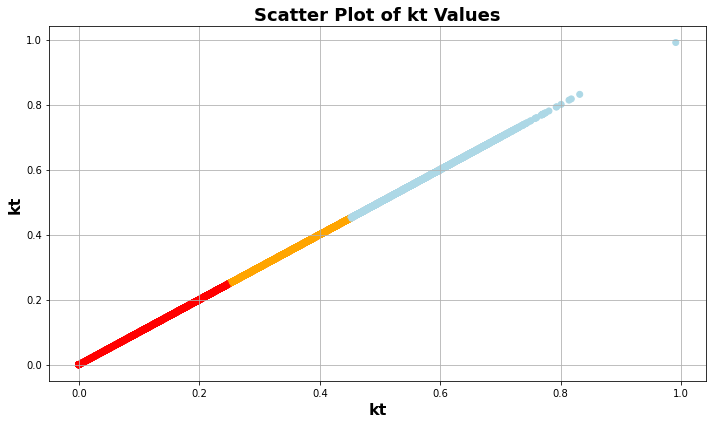

In [180]:
kt_values = df_kt_abidjan[(df_kt_abidjan['kt'] <= 1) & (df_kt_abidjan['kt'] >= 0)]['kt']

colors = []
for kt in kt_values:
    if kt < 0.25:
        colors.append('red')
    elif 0.25 <= kt <= 0.45:
        colors.append('orange')
    else:
        colors.append('lightblue')

plt.figure(figsize=(10, 6))
plt.scatter(kt_values, kt_values, c=colors, marker='o')

plt.title('Scatter Plot of kt Values', fontsize=18, fontweight='bold')
plt.xlabel('kt', fontsize=16, fontweight='bold')
plt.ylabel('kt', fontsize=16, fontweight='bold')
plt.grid(True)

plt.tight_layout()
plt.show()

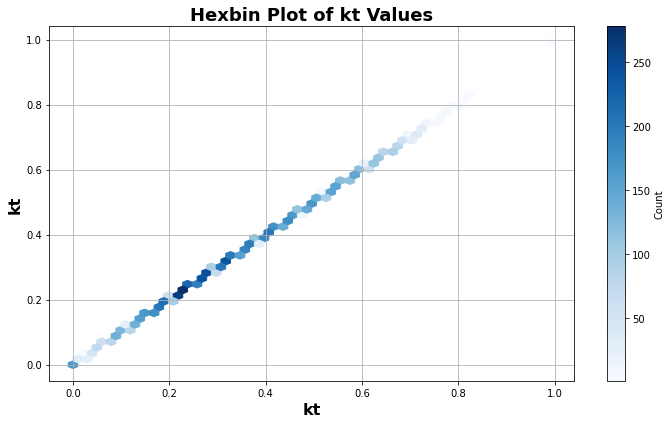

In [179]:
plt.figure(figsize=(10, 6))
hb = plt.hexbin(kt_values, kt_values, gridsize=50, cmap='Blues', mincnt=1)

plt.colorbar(hb, label='Count')
plt.title('Hexbin Plot of kt Values', fontsize=18, fontweight='bold')
plt.xlabel('kt', fontsize=16, fontweight='bold')
plt.ylabel('kt', fontsize=16, fontweight='bold')
plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 1440x576 with 0 Axes>

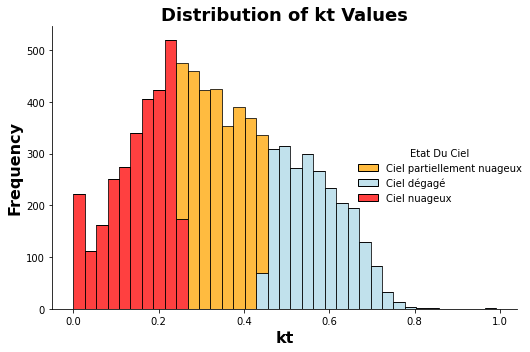

In [66]:
# Assuming df_kt_abidjan is your DataFrame and it contains a column named 'kt'
df_filtered = df_kt_abidjan[(df_kt_abidjan['kt'] <= 1) & (df_kt_abidjan['kt'] >= 0)].copy()

# Define the categories based on the conditions
def categorize_kt(kt):
    if kt < 0.25:
        return 'Ciel nuageux'
    elif 0.25 <= kt <= 0.45:
        return 'Ciel partiellement nuageux'
    else:
        return 'Ciel dégagé'

df_filtered['Etat Du Ciel'] = df_filtered['kt'].apply(categorize_kt)

# Plotting
plt.figure(figsize=(20, 8))
sns.displot(df_filtered, x='kt', hue='Etat Du Ciel', palette={'Ciel nuageux': 'red',  'Ciel partiellement nuageux': 'orange',  'Ciel dégagé': 'lightblue'}, multiple='stack')

plt.title('Distribution of kt Values', fontsize=18, fontweight='bold')
plt.xlabel('kt', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
# plt.grid(True)

plt.tight_layout()
plt.show()




In [ ]:
# Assuming df_kt_abidjan is your DataFrame and it contains a column named 'kt'
df_filtered = df_kt_abidjan[(df_kt_abidjan['kt'] <= 1) & (df_kt_abidjan['kt'] >= 0)].copy()

# Define the colors based on the conditions
colors = []
for kt in df_filtered['kt']:
    if kt < 0.25:
        colors.append('red')
    elif 0.25 <= kt <= 0.45:
        colors.append('orange')
    else:
        colors.append('lightblue')

# Add colors to the DataFrame
df_filtered['colors'] = colors

plt.figure(figsize=(20, 8))
sns.scatterplot(x=df_filtered['kt'], y=df_filtered['kt'], hue=df_filtered['colors'], palette=['red', 'orange', 'lightblue'], legend=False)

plt.title('Scatter Plot of kt Values', fontsize=18, fontweight='bold')
plt.xlabel('kt', fontsize=16, fontweight='bold')
plt.ylabel('kt', fontsize=16, fontweight='bold')
plt.grid(True)

plt.tight_layout()
plt.show()

### Analyse sur la radiance calculée

#### Abidjan

In [16]:
pd.set_option('mode.chained_assignment', None)


In [29]:
df_kt_cal_abidjan = pd.read_csv('./abidjan_mes_cal.csv')

In [30]:
df_kt_cal_abidjan

,Unnamed: 0,Année,Mois,Jour,Heure,IGH,IGH0,G_cal_Gistel,G_cal_Helio
0,649,2017,3,1,7,94.830508,337.753097,64.177787,71.856794
1,650,2017,3,1,8,264.316667,667.758636,186.981930,210.768011
2,651,2017,3,1,9,425.933333,950.042784,510.390488,476.894264
3,652,2017,3,1,10,450.000000,1166.309146,570.956998,606.762014
4,653,2017,3,1,11,547.933333,1301.819525,698.844801,750.637798
...,...,...,...,...,...,...,...,...,...
7053,7979,2018,12,31,13,500.750000,1178.352052,905.978803,851.003070
7054,7980,2018,12,31,14,361.416667,1035.586167,685.663736,687.993145
7055,7981,2018,12,31,15,249.400000,818.728442,700.559061,692.142439
7056,7982,2018,12,31,16,145.216667,542.557371,493.804998,493.682904


In [31]:
def build_kt_calculated(df, column_igh):
    """ddd """
    
    df['kt'] = df[column_igh] / df['IGH0']
    df['Sky State'] = df['kt'].apply(classify_kt)
    df_classified = give_daily_classification(df)
    
    return df, df_classified

In [32]:
def plot_and_save_kt_calculted(df_kt_calculated, city):
    """ddf """
    
    df_kt_calculated = df_kt_calculated.drop(columns=['Unnamed: 0'])
    
    df_kt_calculated['Date'] = pd.to_datetime(dict(year=df_kt_calculated['Année'], month=df_kt_calculated['Mois'], day=df_kt_calculated['Jour'], hour=df_kt_calculated['Heure']))
    
    df_kt_gistel = df_kt_calculated.drop(columns=['IGH', 'G_cal_Helio'])
    df_kt_helio = df_kt_calculated.drop(columns=['IGH', 'G_cal_Gistel'])
    
    
    df_kt_gistel, df_classified_gistel = build_kt_calculated(df_kt_gistel, 'G_cal_Gistel')
    df_kt_helio, df_classified_helio = build_kt_calculated(df_kt_helio, 'G_cal_Helio')
    
    output_folder = os.path.join('data', 'output', 'kt_plots_calculated', city)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
#     plot_filename = os.path.join(output_folder, f'Indice_Kt_{city}_{month_name}_{year}.png')

    df_kt_gistel.to_csv(f'./{output_folder}/indice_clarté_gistel.csv')
    df_classified_gistel.to_csv(f'./{output_folder}/etats_journaliers_gistel.csv')
    
    df_kt_helio.to_csv(f'./{output_folder}/indice_clarté_helio.csv')
    df_classified_helio.to_csv(f'./{output_folder}/etats_journaliers_helio.csv')
    
    df_kt_gistel.rename(columns={'Année': 'Year',
                                'Mois': 'Month'}, inplace=True)

        
    df_kt_helio.rename(columns={'Année': 'Year',
                                'Mois': 'Month'}, inplace=True)
    
    plot_and_save_kt(df_kt_gistel, city + "_gistel")
    plot_and_save_kt(df_kt_helio, city + "_helio" )
    
    plot_and_save_daily_states(df_kt_gistel, city + "_gistel")
    plot_and_save_daily_states(df_kt_helio, city + "_helio" )


In [33]:
plot_and_save_kt_calculted(df_kt_cal_abidjan, 'abidjan')


C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

#### M'brimbo

In [22]:
df_kt_cal_mbrimbo = pd.read_csv('./mbrimbo_mes_cal.csv')

In [23]:
plot_and_save_kt_calculted(df_kt_cal_mbrimbo, 'mbrimbo')


C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

#### Yamoussokro

In [24]:
df_kt_cal_yakro = pd.read_csv('./yakro_mes_cal.csv')

In [25]:
plot_and_save_kt_calculted(df_kt_cal_yakro, 'yamoussoukro')


C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

### Analyse sur les Kt calculés

In [28]:
def categorize_kt_gistel(kt):
    """ func """
    if kt == 1:
        return 'Ciel dégagé'
    elif kt == 0.2:
        return 'Ciel nuageux'
    else:
        return 'Ciel partiellement nuageux'


def categorize_kc_heliostat(kc):
    if kc == 1.2:
        return 'Ciel nuageux'
    elif kc == 0.05:
        return 'Ciel dégagé'
    else:
        return 'Ciel partiellement nuageux'



In [ ]:
def plot_save_calculated_kts(df, city):
    """ func """
    
    df['Date'] = pd.to_datetime(dict(year=df['Année'], month=df['Mois'], day=df['Jour'], hour=df['Heure']))

    
    df_kt_gistel = df.drop(columns=['kt', 'K_C'])
    df_kt_helio = df.drop(columns=['kt', 'Kt_Gistel'])
    
    df_kt_gistel['Sky State'] = df_kt_gistel['Kt_Gistel'].apply(categorize_kt_gistel)
    df_kt_helio['Sky State'] = df_kt_helio['K_C'].apply(categorize_kc_heliostat)
    df_classified_gistel = give_daily_classification(df_kt_gistel)
    df_classified_helio = give_daily_classification(df_kt_helio)
    
    output_folder = os.path.join('data', 'miscellaneous', 'kt_models_plots', city)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    df_kt_gistel.to_csv(f'./{output_folder}/indice_clarté_gistel_{city}.csv')
    df_classified_gistel.to_csv(f'./{output_folder}/etats_journaliers_gistel_{city}.csv')
    
    df_kt_helio.to_csv(f'./{output_folder}/indice_clarté_helio_{city}.csv')
    df_classified_helio.to_csv(f'./{output_folder}/etats_journaliers_helio_{city}.csv')
    
    df_kt_gistel.rename(columns={'Année': 'Year',
                                'Mois': 'Month'}, inplace=True)

        
    df_kt_helio.rename(columns={'Année': 'Year',
                                'Mois': 'Month'}, inplace=True)
    
    plot_and_save_kt(df_kt_gistel, city + "_gistel", 'Kt_Gistel')
    plot_and_save_kt(df_kt_helio, city + "_helio", 'K_C' )
    
    plot_and_save_daily_states(df_kt_gistel, city + "_gistel", 'Kt_Gistel')
    plot_and_save_daily_states(df_kt_helio, city + "_helio", 'K_C' )
    

#### Abidjan

In [ ]:
df_kt_all_abidjan = pd.read_csv('./abidjan_kt_all_models.csv')

In [ ]:
plot_save_calculated_kts(df_kt_all_abidjan, 'abidjan')

#### Mbrimbo

In [ ]:
df_kt_all_mbrimbo = pd.read_csv('./mbrimbo_kt_all_models.csv')

In [ ]:
plot_save_calculated_kts(df_kt_all_mbrimbo, 'mbrimbo')

#### Yakro

In [ ]:
df_kt_all_yakro = pd.read_csv('./yakro_kt_all_models.csv')

In [ ]:
plot_save_calculated_kts(df_kt_all_yakro, 'yamoussoukro')

### Ajout de nouveaux graphiques

#### Graphique Boxplot des Kt par Année

In [ ]:
def plot_boxplot_per_year(df, city):
    """ bx """
    
    years = df['Année'].unique()
    colors = ['lightgrey', '#FF6600']  # List of colors for each year
    
    output_folder = os.path.join('data', 'miscellaneous', 'from_document', city)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)


    for i, year in enumerate(years):
        plt.figure(figsize=(12, 9))
        sns.boxplot(x='Heure', y='kt', data=df[df['Année'] == year], color=colors[i])
        plt.title(f'Profil Kt {year}',fontsize=20)
        plt.xlabel('Heure', fontsize=18)
        plt.ylabel('Indice de Clarté', fontsize=18)
        plt.xticks(rotation=45, fontsize=16)
        plt.yticks(fontsize=15)       

        plt.tight_layout()
        
        # Save plot
        plot_filename = os.path.join(f"data/miscellaneous/from_document/{city}", f'Profil_Horaire_{city}_{year}.png')
        plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
        plt.close()

In [ ]:
plot_boxplot_per_year(df_kt_all_abidjan, 'abidjan')

In [ ]:
plot_boxplot_per_year(df_kt_all_mbrimbo, 'mbrimbo')

In [ ]:
plot_boxplot_per_year(df_kt_all_yakro, 'yakro')

#### Diagramme Circulaire des Etats du Ciel

In [ ]:
 # Define the palette for sky states
palette = {'Ciel nuageux': '#828282', 
               'Ciel partiellement nuageux': '#838FA7', 
               'Ciel dégagé': '#FFC508'}
    
def plot_pie_state(df, city):
    """ func """
    
    df['Date'] = pd.to_datetime(dict(year=df['Année'], month=df['Mois'], day=df['Jour'], hour=df['Heure']))

    
    df_kt = df.drop(columns=['Kt_Gistel', 'K_C'])
    
    df_kt['Sky State'] = df_kt['kt'].apply(classify_kt)
    
    # Get the unique years
    years = df_kt['Année'].unique()

    for year in years:
        df_year = df_kt[df_kt['Année'] == year]

        # Calculate the percentage of each sky state
        sky_state_counts = df_year['Sky State'].value_counts(normalize=True) * 100
        
        explode = [0.05] * len(sky_state_counts)  # Slightly explode all slices


        # Plot pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(sky_state_counts, 
                labels=sky_state_counts.index, 
                autopct='%1.1f%%', 
                colors=[palette[state] for state in sky_state_counts.index],
                startangle=90,
                wedgeprops={'edgecolor': 'black'},
                )

        # Add a title
        plt.title(f"Bilan de Classification St_{city} {year}")
        plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
        
        plt.tight_layout()
        
        # Save plot
        plot_filename = os.path.join(f"data/miscellaneous/from_document/{city}", f'Bilan_classification_{city}_{year}.png')
        plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
        plt.close()

In [ ]:
plot_pie_state(df_kt_all_abidjan, 'abidjan')

In [ ]:
plot_pie_state(df_kt_all_mbrimbo, 'mbrimbo')

In [ ]:
plot_pie_state(df_kt_all_yakro, 'yamoussoukro')